# Breakdowns analysis - FY 2024


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





# Import libraries and load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /Apr_1-March_16 breakdowns.csv')

In [5]:
data.head(10)

,ID,vin,RTO Registration Number,FOS,FON,Incident Date,Incident Time,Incident Description,Injury,Injury Details,Vehicle Loaded,Damaged,Damage Details,Action Plan,Incident Type,Status,Responsiblity,Root cause,Date of Closure,Time of Closure
0,IR202503165,MD9B55CWWPD558770,KA53AB1260,Huskuru,BLR,"March 16, 2025",16.07,front fork issue,YES,na,YES,YES,na,please clear this issue asap,Mechanical,CREATED,NaN,NaN,NaN,NaN
1,IR202503164,MD9B30CWWND558400,KA53AA6111,Nagelkenni,CHN,"March 16, 2025",10.25,Vehicle not moving conditions,NO,NaN,YES,NO,NaN,Vehicle not moving conditions,Mechanical,CREATED,NaN,Vehicle not moving conditions,NaN,NaN
2,IR202503163,MD9B30CWWNC558349,TN85R9214,Nagelkenni,CHN,"March 16, 2025",10.25,Vehicle not moving conditions,NO,NaN,YES,NO,NaN,Vehicle not moving conditions,Mechanical,CREATED,NaN,Vehicle not moving conditions,NaN,NaN
3,IR202503162,MD9B30CWWMJ558177,KA53AA4808,Nagelkenni,CHN,"March 16, 2025",5.25,Vehicle not moving conditions,NO,NaN,YES,NO,NaN,Vehicle not moving conditions,Mechanical,CREATED,NaN,Vehicle not moving conditions,NaN,NaN
4,IR202503161,MD9B30CWWNE558501,KA53AA8349,Nacharam,HYD,"March 16, 2025",9.49,Font mudguard damage,NO,NaN,YES,NO,NaN,Font mudguard damage Need to repair,Accident,RESOLVED,3eco,NaN,"March 17, 2025",23.28
5,IR2025031514,MD9B30CWWMM558224,KA53AA4899,Madhavaram,CHN,"March 15, 2025",18.33,No front glass and 3 wheel damage so we cant s...,YES,No front glass and 3 wheel damage so we cant s...,NO,NO,NaN,No front glass and 3 wheel damage so we cant s...,Mechanical,CREATED,NaN,NaN,NaN,NaN
6,IR2025031513,MD9B55CWWPC558724,KA53AB0025,Madhavaram,CHN,"March 15, 2025",18.17,Fork issue we cant give the vehicle to route,YES,Fork issue we cant give the vehicle to route,NO,NO,NaN,Fork issue we cant give the vehicle to route,Mechanical,CREATED,NaN,NaN,NaN,NaN
7,IR2025031512,MD9B55CWWPE558950,KA53AB2276,Goregaon,MMB,"March 15, 2025",17.29,fornt glass and door and strening,YES,fornt glass and door and strening,NO,YES,fornt glass and door and strening,i inform to ev team,Accident,REJECTED,NaN,NaN,NaN,NaN
8,IR2025031511,MD9B55CWWPD558865,KA53AB1682,Ghatkopar Electric Fuel,MMB,"March 15, 2025",15.31,cantrol issue,YES,cantrol issue,NO,YES,cantrol issue,i inform to ev team,Mechanical,CREATED,NaN,cantrol issue,NaN,NaN
9,IR2025031510,MBX0000FBLF871897,KA524412,Ghatkopar Electric Fuel,MMB,"March 15, 2025",14.39,welding issue,YES,welding issue,NO,YES,welding issue,i inform to ev team,Mechanical,CREATED,NaN,welding issue,NaN,NaN


# Data wrangling and cleaning


Last 6 months data has been imported from Epro dashboard and has been cleaned in excel data model.


1.  Unnecessary columns have been removed
2.  calculated column FON is added , using Vlook up.
3.date outliers have been removed(2023, and march data synced incorrectly)







In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4262 entries, 0 to 4261
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4262 non-null   object 
 1   vin                      4262 non-null   object 
 2   RTO Registration Number  4262 non-null   object 
 3   FOS                      4262 non-null   object 
 4   FON                      4262 non-null   object 
 5   Incident Date            4262 non-null   object 
 6   Incident Time            4262 non-null   float64
 7   Incident Description     4262 non-null   object 
 8   Injury                   4262 non-null   object 
 9   Injury Details           1680 non-null   object 
 10  Vehicle Loaded           4262 non-null   object 
 11  Damaged                  4262 non-null   object 
 12  Damage Details           2148 non-null   object 
 13  Action Plan              4261 non-null   object 
 14  Incident Type           

In [7]:
data.describe()

,Incident Time,Time of Closure
count,4262.000000,1632.000000
mean,11.847750,17.527506
std,3.794584,7.190396
min,0.000000,0.010000
25%,9.350000,16.250000
50%,11.200000,20.365000
75%,13.540000,22.470000
max,23.590000,23.590000


In [8]:
print(data.dtypes)

ID                          object
vin                         object
RTO Registration Number     object
FOS                         object
FON                         object
Incident Date               object
Incident Time              float64
Incident Description        object
Injury                      object
Injury Details              object
Vehicle Loaded              object
Damaged                     object
Damage Details              object
Action Plan                 object
Incident Type               object
Status                      object
Responsiblity               object
Root cause                  object
Date of Closure             object
Time of Closure            float64
dtype: object


In [9]:
# Convert 'Incident Date' and 'Date of Closure' to datetime objects
data['Incident Date'] = pd.to_datetime(data['Incident Date'])
data['Date of Closure'] = pd.to_datetime(data['Date of Closure'])


In [10]:
max(data['Incident Date'])

Timestamp('2025-03-16 00:00:00')

In [11]:
min(data['Incident Date'])

Timestamp('2023-06-30 00:00:00')

In [12]:
 #remove rows which are before 1 april 2024

from datetime import datetime
# Filter out rows before April 1, 2024
data = data[data['Incident Date'] >= datetime(2024, 4, 1)]


In [13]:
min(data['Incident Date'])

Timestamp('2024-04-01 00:00:00')

In [14]:
# Count the rows where 'Status' is 'REJECTED'
rejected_count = data[data['Status'] == 'REJECTED'].shape[0]

# Print the count of rejected rows
print(rejected_count)

417


In [15]:
# remove the rows where column Status value is REJECTED

data = data[data['Status'] != 'REJECTED']


In [16]:
rejected_count = data[data['Status'] == 'REJECTED'].shape[0]

# Print the count of rejected rows
print(rejected_count)

0


In [17]:
# count incidents and group them by Incident Type

incident_counts = data.groupby('Incident Type')['Incident Type'].count()
print(incident_counts)


Incident Type
Accident         364
Electrical       253
Mechanical      2861
Minor Issues     361
Name: Incident Type, dtype: int64


In [18]:
#rows with Incident Type as Minor issues

minor_issues_rows = data[data['Incident Type'] == 'Minor Issues'].shape[0]
print(minor_issues_rows)

361


In [19]:
# Remove row with Minor Issues

data = data[data['Incident Type'] != 'Minor Issues']


In [20]:
incident_counts = data.groupby('Incident Type')['Incident Type'].count()
print(incident_counts)

Incident Type
Accident       364
Electrical     253
Mechanical    2861
Name: Incident Type, dtype: int64


In [21]:
#  group count of ID by status, just print the Status and count of ids for that status

id_count_by_status = data.groupby('Status')['ID'].count()
print(id_count_by_status)


Status
CREATED        29
ESTIMATED       7
RESOLVED     3442
Name: ID, dtype: int64


# Data analysis and KPI's

###VIN numbers and breakdown percentage calculation of repeated breakdowns.

<ipython-input-22-6c62f86a21c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Incident Date'] = pd.to_datetime(data['Incident Date'])
<ipython-input-22-6c62f86a21c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Incident Date'].dt.to_period('M')
<ipython-input-22-6c62f86a21c7>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will n

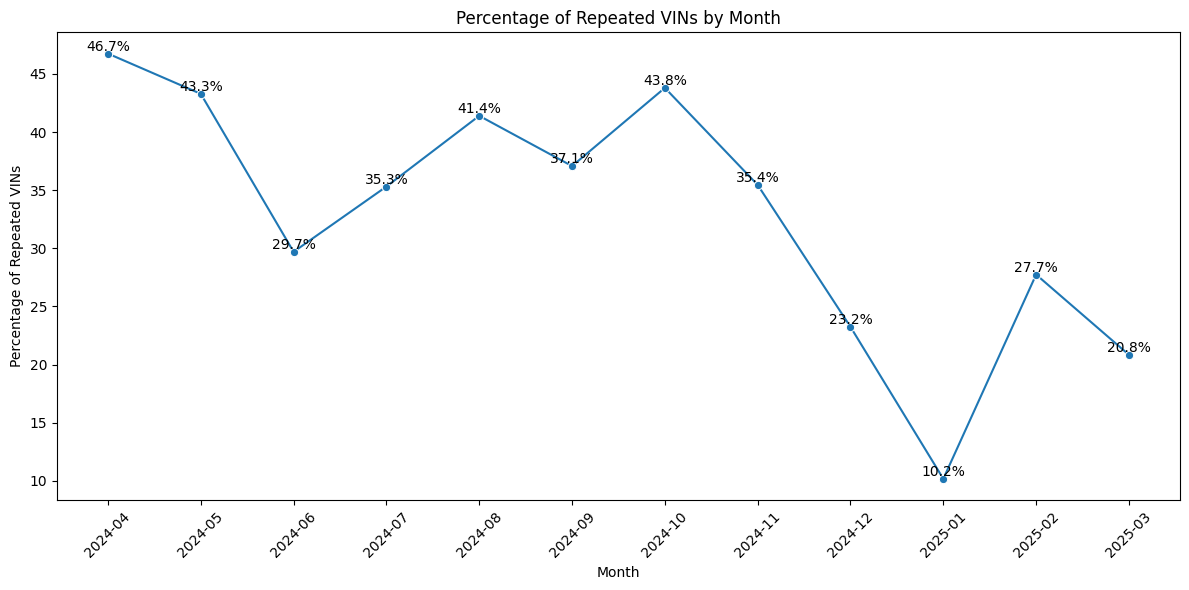

<ipython-input-22-6c62f86a21c7>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)


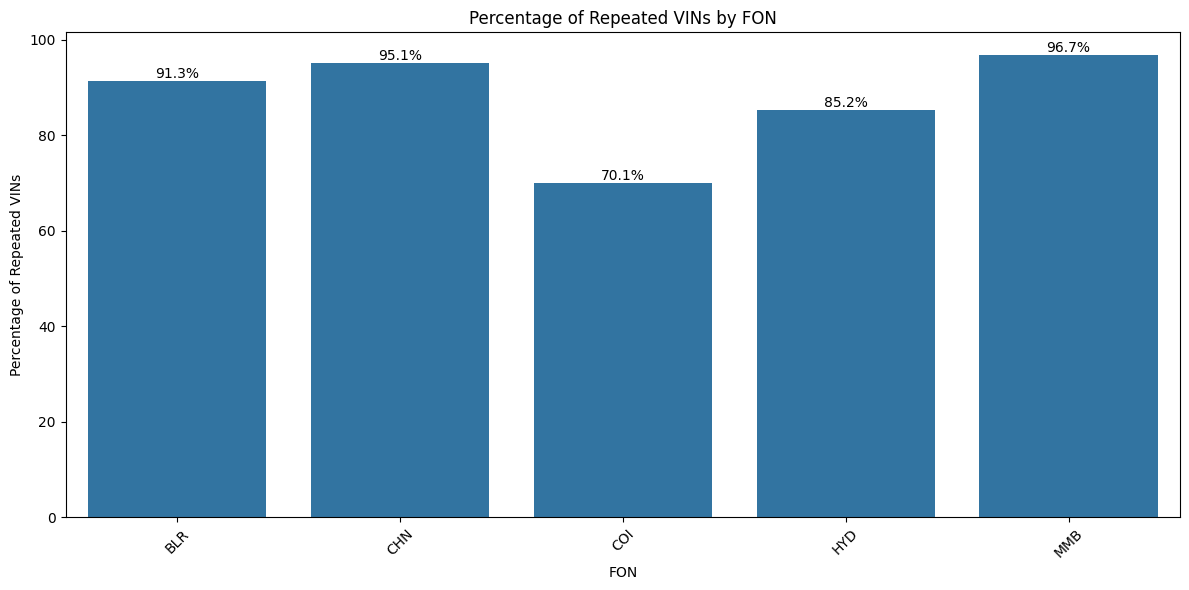

In [22]:
# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Calculate the percentage of repeated VINs by month
data['Month'] = data['Incident Date'].dt.to_period('M')

monthly_vin_counts = data.groupby(['Month', 'vin'])['vin'].count().reset_index(name='VIN_Count')
monthly_total_vins = monthly_vin_counts.groupby('Month')['VIN_Count'].sum().reset_index(name='Total_VINS')

# Identify repeated VINs (those appearing more than once)
monthly_repeated_vins = (
    monthly_vin_counts[monthly_vin_counts['VIN_Count'] > 1]
    .groupby('Month')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_monthly_data = pd.merge(monthly_total_vins, monthly_repeated_vins, on='Month', how='left')
merged_monthly_data['Repeated_VINS'].fillna(0, inplace=True)
merged_monthly_data['Repeated_VIN_Percentage'] = (merged_monthly_data['Repeated_VINS'] / merged_monthly_data['Total_VINS']) * 100

# Plotting repeated VIN percentage by month with data labels
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=merged_monthly_data['Month'].astype(str), y='Repeated_VIN_Percentage', data=merged_monthly_data, marker='o')

# Adding labels to each data point
for i, row in merged_monthly_data.iterrows():
    plt.text(row['Month'].strftime('%Y-%m'), row['Repeated_VIN_Percentage'], f"{row['Repeated_VIN_Percentage']:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the percentage of repeated VINs by FON
fon_vin_counts = data.groupby(['FON', 'vin'])['vin'].count().reset_index(name='VIN_Count')
fon_total_vins = fon_vin_counts.groupby('FON')['VIN_Count'].sum().reset_index(name='Total_VINS')

fon_repeated_vins = (
    fon_vin_counts[fon_vin_counts['VIN_Count'] > 1]
    .groupby('FON')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_fon_data = pd.merge(fon_total_vins, fon_repeated_vins, on='FON', how='left')
merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)
merged_fon_data['Repeated_VIN_Percentage'] = (merged_fon_data['Repeated_VINS'] / merged_fon_data['Total_VINS']) * 100

# Plotting repeated VIN percentage by FON with data labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='FON', y='Repeated_VIN_Percentage', data=merged_fon_data)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xlabel('FON')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by FON')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-23-8984175b4d58>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)


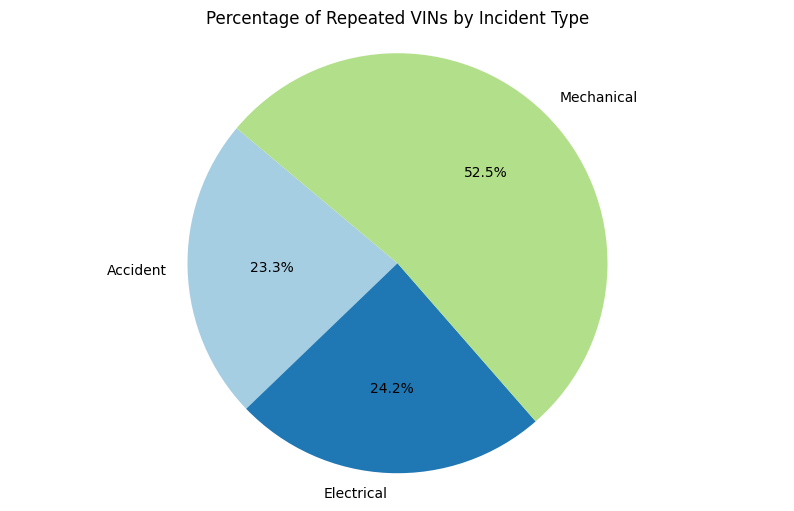

<ipython-input-23-8984175b4d58>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_status_data['Repeated_VINS'].fillna(0, inplace=True)


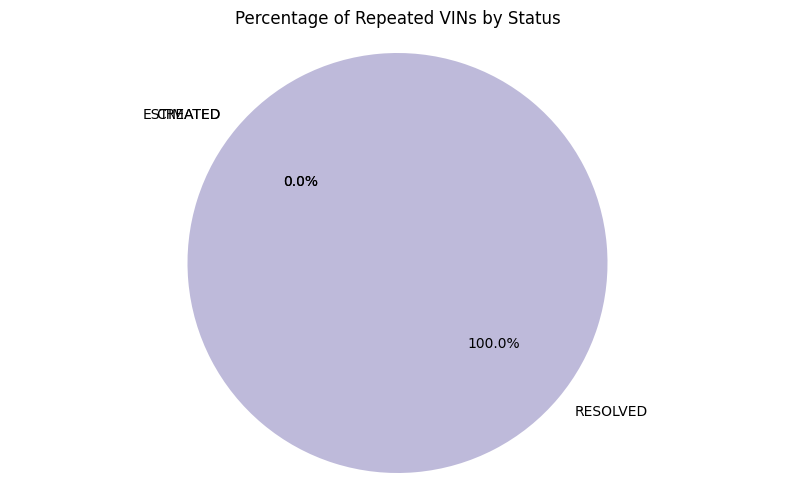

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Incident Type
incident_type_vin_counts = data.groupby(['Incident Type', 'vin'])['vin'].count().reset_index(name='VIN_Count')
incident_type_total_vins = incident_type_vin_counts.groupby('Incident Type')['VIN_Count'].sum().reset_index(name='Total_VINS')

incident_type_repeated_vins = (
    incident_type_vin_counts[incident_type_vin_counts['VIN_Count'] > 1]
    .groupby('Incident Type')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

merged_incident_type_data = pd.merge(incident_type_total_vins, incident_type_repeated_vins, on='Incident Type', how='left')
merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)
merged_incident_type_data['Repeated_VIN_Percentage'] = (merged_incident_type_data['Repeated_VINS'] / merged_incident_type_data['Total_VINS']) * 100

# Plot pie chart for Incident Type
plt.figure(figsize=(10, 6))
plt.pie(
    merged_incident_type_data['Repeated_VIN_Percentage'],
    labels=merged_incident_type_data['Incident Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Percentage of Repeated VINs by Incident Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


# Group by Status
status_vin_counts = data.groupby(['Status', 'vin'])['vin'].count().reset_index(name='VIN_Count')
status_total_vins = status_vin_counts.groupby('Status')['VIN_Count'].sum().reset_index(name='Total_VINS')

status_repeated_vins = (
    status_vin_counts[status_vin_counts['VIN_Count'] > 1]
    .groupby('Status')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

merged_status_data = pd.merge(status_total_vins, status_repeated_vins, on='Status', how='left')
merged_status_data['Repeated_VINS'].fillna(0, inplace=True)
merged_status_data['Repeated_VIN_Percentage'] = (merged_status_data['Repeated_VINS'] / merged_status_data['Total_VINS']) * 100

# Plot pie chart for Status
plt.figure(figsize=(10, 6))
plt.pie(
    merged_status_data['Repeated_VIN_Percentage'],
    labels=merged_status_data['Status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Percentage of Repeated VINs by Status')
plt.axis('equal')
plt.show()



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Import adjustText for better label positioning

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])
data['Month'] = data['Incident Date'].dt.to_period('M').astype(str)  # Convert Period to String

# Calculate repeated VINs per Incident Type and Month
incident_type_vin_counts = data.groupby(['Month', 'Incident Type', 'vin'])['vin'].count().reset_index(name='VIN_Count')
incident_type_total_vins = incident_type_vin_counts.groupby(['Month', 'Incident Type'])['VIN_Count'].sum().reset_index(name='Total_VINS')

incident_type_repeated_vins = (
    incident_type_vin_counts[incident_type_vin_counts['VIN_Count'] > 1]
    .groupby(['Month', 'Incident Type'])['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_incident_type_data = pd.merge(incident_type_total_vins, incident_type_repeated_vins, on=['Month', 'Incident Type'], how='left')
merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)
merged_incident_type_data['Repeated_VIN_Percentage'] = (merged_incident_type_data['Repeated_VINS'] / merged_incident_type_data['Total_VINS']) * 100

# Pivot to get Incident Types as separate series
pivot_df = merged_incident_type_data.pivot(index='Month', columns='Incident Type', values='Repeated_VIN_Percentage')

# Plot line graph with multiple series
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=pivot_df, markers=True, dashes=False)

# Adding Data Labels
texts = []  # Store text labels for adjustment
for line, incident_type in zip(ax.lines, pivot_df.columns):
    for x, y in zip(pivot_df.index, line.get_ydata()):
        if not pd.isna(y):  # Skip NaN values
            text = ax.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, color=line.get_color())
            texts.append(text)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Formatting the graph
plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by Incident Type Over Time')
plt.xticks(rotation=45)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




ModuleNotFoundError: No module named 'adjustText'

In [26]:
!pip install adjustText

<ipython-input-27-c0b3953fba77>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)


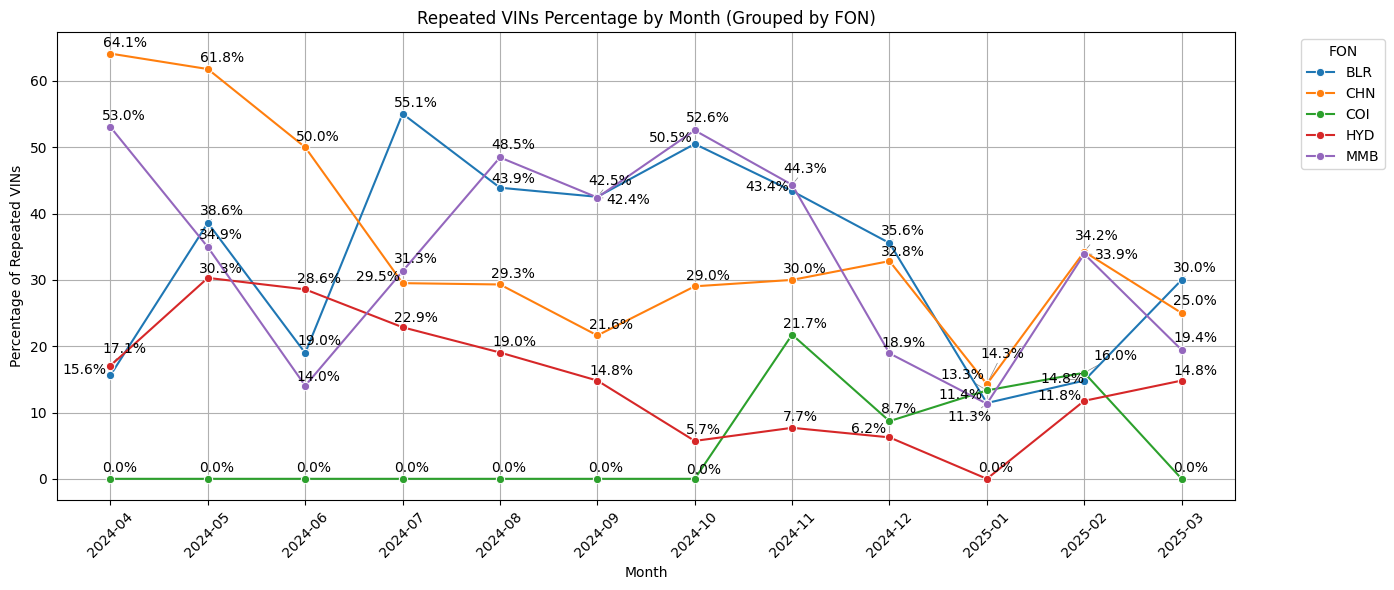

In [27]:

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Extract month for grouping
data['Month'] = data['Incident Date'].dt.to_period('M')

# Group by Month, FON, and VIN to count occurrences
fon_vin_counts = data.groupby(['Month', 'FON', 'vin'])['vin'].count().reset_index(name='VIN_Count')

# Calculate total VINs per FON per Month
fon_total_vins = fon_vin_counts.groupby(['Month', 'FON'])['VIN_Count'].sum().reset_index(name='Total_VINS')

# Identify repeated VINs per FON per Month
fon_repeated_vins = (
    fon_vin_counts[fon_vin_counts['VIN_Count'] > 1]
    .groupby(['Month', 'FON'])['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge the datasets
merged_fon_data = pd.merge(fon_total_vins, fon_repeated_vins, on=['Month', 'FON'], how='left')
merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)
merged_fon_data['Repeated_VIN_Percentage'] = (merged_fon_data['Repeated_VINS'] / merged_fon_data['Total_VINS']) * 100

# Convert Month to string format for better visualization
merged_fon_data['Month'] = merged_fon_data['Month'].astype(str)

# Plot: Line Graph of Repeated VINs Percentage by Month for each FON
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=merged_fon_data, x='Month', y='Repeated_VIN_Percentage', hue='FON', marker='o')

# Adding labels to each data point using adjustText
texts = []
for i, row in merged_fon_data.iterrows():
    texts.append(plt.text(row['Month'], row['Repeated_VIN_Percentage'], f"{row['Repeated_VIN_Percentage']:.1f}%",
                          ha='center', va='bottom', fontsize=10))

# Adjust text positions to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Repeated VINs Percentage by Month (Grouped by FON)')
plt.xticks(rotation=45)
plt.legend(title="FON", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




# Last 7 days analysis


## Last 7 days breakdowns

In [ ]:
#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)
last_7_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# 1. Table: with accident
fon_breakdown_all = last_7_days_data.groupby(['FON', 'Incident Type'])['ID'].count().unstack().fillna(0)
fon_breakdown_all['Total'] = fon_breakdown_all.sum(axis=1)
print("FON Wise Breakdowns (All Incident Types) from 10 march to 16 March:")
display(fon_breakdown_all)


# 2. Table: Without Accident
no_accident_data = last_7_days_data[last_7_days_data['Incident Type'] != 'Accident']
fon_breakdown_no_accident = no_accident_data.groupby(['FON', 'Incident Type'])['ID'].count().unstack().fillna(0)
fon_breakdown_no_accident['Total'] = fon_breakdown_no_accident.sum(axis=1)
print("FON Wise Breakdowns (Without Accidents)from 10 march to 16 March")
display(fon_breakdown_no_accident)

# accidental  damanges to be made out of it .


In [ ]:
#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Graph 1: All Breakdown Types for the period
daily_breakdowns_all = period_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_all = daily_breakdowns_all.reindex(all_dates, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns_all.index, daily_breakdowns_all.values, marker='o', linestyle='-', color='blue', label='All Breakdowns')

# Add data labels to the points
for x, y in zip(daily_breakdowns_all.index, daily_breakdowns_all.values):
    plt.text(x, y+0.05, str(y), ha='center', va='bottom', fontsize=11)
# Customization
plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns from 10th March to 16th March (With accidents)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()



In [ ]:
# Graph 2: Breakdowns excluding accidents for the period
no_accidents_data = period_data[period_data['Incident Type'] != 'Accident']
daily_breakdowns_no_accidents = no_accidents_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_no_accidents = daily_breakdowns_no_accidents.reindex(all_dates, fill_value=0)


plt.figure(figsize=(12, 6))

plt.plot(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values, marker='o', linestyle='-', color='green', label='Breakdowns (Excluding Accidents)')

# Add data labels to the points
for x, y in zip(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values):
    plt.text(x, y+0.05, str(y), ha='center', va='bottom', fontsize=11)

# Customization
plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns from 10th march to 16th March (Without accidents) ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()

### last 7 days breakdowns FON wise


In [ ]:
# last 7 days breakdowns FON wise

# Group by FON and count breakdowns
fon_breakdowns = last_7_days_data.groupby('FON')['ID'].count()

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(fon_breakdowns.index, fon_breakdowns.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('FON')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns FON Wise from 10th March to 16th March(with accidents)')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')
# Set the light blue background
plt.gca().set_facecolor('lightblue')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#  without accidents

import matplotlib.pyplot as plt
# Filter out rows with 'Incident Type' as 'Accident'
no_accidents_data_last_7_days = last_7_days_data[last_7_days_data['Incident Type'] != 'Accident']

# Group by FON and count breakdowns (excluding accidents)
fon_breakdowns_no_accidents = no_accidents_data_last_7_days.groupby('FON')['ID'].count()

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(fon_breakdowns_no_accidents.index, fon_breakdowns_no_accidents.values, color=['green','blue', 'orange','purple', 'red'])
plt.xlabel('FON')
plt.ylabel('Number of Breakdowns')
plt.title(' Breakdowns FON Wise from 10th March to 16th March (Excluding Accidents)')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')
# Set the light blue background
plt.gca().set_facecolor('lightblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## last 7 days breakdowns by type

In [ ]:

#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)

period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group by Incident Type and count the number of breakdowns
incident_type_counts = period_data.groupby('Incident Type')['ID'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
colors = ['orange', 'blue','green']  # Define colors for each slice
plt.pie(incident_type_counts, labels=incident_type_counts.index, autopct='%1.1f%%', startangle=120, colors=colors)
plt.title('Breakdown Types from 10th march to 16th March(with Accidents) ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.gcf().set_facecolor('lightblue')

# Add a border around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Border color
    spine.set_linewidth(2)        # Border thickness

plt.show()


# Print the counts for each incident type
print("Incident Type Counts:")
print(incident_type_counts)


In [ ]:
# without accident
#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Filter out rows with 'Incident Type' as 'Accident'
no_accidents_data = period_data[period_data['Incident Type'] != 'Accident']

# Group by Incident Type and count the number of breakdowns
incident_type_counts_no_accidents = no_accidents_data.groupby('Incident Type')['ID'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
colors = ['blue', 'orange', 'blue']  # Define colors for each slice
plt.pie(incident_type_counts_no_accidents, labels=incident_type_counts_no_accidents.index, autopct='%1.1f%%', startangle=120, colors=colors)
plt.title('Breakdown Types from 10th March to 16th March (without accidents)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().set_facecolor('lightblue')

# Add a border around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Border color
    spine.set_linewidth(2)        # Border thickness

plt.show()

# Print the counts for each incident type
print("Incident Type Counts:")
print(incident_type_counts_no_accidents)


In [ ]:
data.info()

Last 7 days Root causes

In [ ]:

# Group by 'Root Cause' and count breakdowns
root_cause_counts = period_data.groupby('Root cause')['ID'].count().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values, color='Blue')
plt.xlabel('Root causes')
plt.ylabel('Count of Breakdowns')
plt.title('Root Causes vs. Count of Breakdowns (10th March to 16th March)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.gca().set_facecolor('lightblue')


plt.show()



In [ ]:
#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)
MTD_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

import matplotlib.pyplot as plt
# Assuming 'period_data' DataFrame from the previous code is available

# Group by 'Root Cause' and count breakdowns
root_cause_counts = MTD_data.groupby('Root cause')['ID'].count().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values, color='blue')
plt.xlabel('Root causes')
plt.ylabel('Count of Breakdowns')
plt.title('Root Causes vs. Count of Breakdowns - MTD Feb')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.gca().set_facecolor('lightblue')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Last 7 days - breakdowns-  Responsiblity

In [ ]:


#Table for breakdowns from 10th March to 16th March

start_date = datetime(2025, 3, 10)
end_date = datetime(2025, 3, 16)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Replace both NaN and blank/whitespace-only values in the 'Responsiblity' column with 'TBD'
period_data['Responsiblity'] = period_data['Responsiblity'].replace([np.nan, ''], 'TBD')
period_data['Responsiblity'] = period_data['Responsiblity'].str.strip().replace('', 'TBD')

# Group by 'Responsiblity' and count occurrences
responsibility_counts = period_data.groupby('Responsiblity')['ID'].count()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(responsibility_counts, labels=responsibility_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Breakdown Responsibility from 10 March to 16 March' )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().set_facecolor('lightblue')
plt.show()


## Last 6 weeks trend


In [ ]:

data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Calculate the year and week number based on the ISO calendar
data['Year'] = data['Incident Date'].dt.isocalendar().year
data['Week'] = data['Incident Date'].dt.isocalendar().week

# Combine year and week to handle year transitions
data['Year_Week'] = data['Year'].astype(str) + '-' + data['Week'].astype(str)

# Create a table for breakdowns by week
weekly_breakdowns = data.groupby('Year_Week')['ID'].count().reset_index()
weekly_breakdowns = weekly_breakdowns.rename(columns={'ID': 'Breakdown Count'})

# Calculate the current week and year
current_date = datetime(2025, 3, 16)  # Replace with `datetime.now()` for dynamic calculation
start_date = current_date - timedelta(weeks=5)

# Collect all weeks between the start date and current date
weeks_to_show = []
for i in range(6):  # Last 6 weeks
    week_date = start_date + timedelta(weeks=i)
    year = week_date.isocalendar().year
    week = week_date.isocalendar().week
    weeks_to_show.append(f"{year}-{week}")

# Filter and sort the table for the past 6 weeks
weekly_breakdowns = weekly_breakdowns[weekly_breakdowns['Year_Week'].isin(weeks_to_show)]

# Ensure chronological order
weekly_breakdowns['Year'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns['Week'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[1]))
weekly_breakdowns = weekly_breakdowns.sort_values(by=['Year', 'Week']).drop(columns=['Year', 'Week'])

# Display the table
print("Breakdowns by Week (Past 6 Weeks):")
display(weekly_breakdowns)




In [ ]:

# Extract Year and Week for proper numerical sorting
weekly_breakdowns['Year'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns['Week'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[1]))

# Sort by Year and Week in ascending order
weekly_breakdowns = weekly_breakdowns.sort_values(by=['Year', 'Week']).drop(columns=['Year', 'Week'])

# Define colors for the bars
colors = ['magenta', 'yellow', 'orange', 'blue', 'red', 'green']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_breakdowns['Year_Week'], weekly_breakdowns['Breakdown Count'], color=colors)

# Add titles and labels
plt.xlabel('Week (Year-Week Format)')
plt.ylabel('Breakdown Count')
plt.title('Breakdowns Trend in the Last 6 Weeks (with Accidents)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Set a light blue background for the plot
plt.gca().set_facecolor('lightblue')

# Adjust tick labels and layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()





In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter out rows where 'Incident Type' is 'Accident'
no_accidents_data = data[data['Incident Type'] != 'Accident']

# Calculate the year and week number based on the ISO calendar
no_accidents_data['Year'] = no_accidents_data['Incident Date'].dt.isocalendar().year
no_accidents_data['Week'] = no_accidents_data['Incident Date'].dt.isocalendar().week

# Combine year and week to handle year transitions
no_accidents_data['Year_Week'] = (
    no_accidents_data['Year'].astype(str) + '-' + no_accidents_data['Week'].astype(str)
)

# Create a table for breakdowns by week
weekly_breakdowns_no_accidents = (
    no_accidents_data.groupby('Year_Week')['ID'].count().reset_index()
)
weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.rename(
    columns={'ID': 'Breakdown Count'}
)

# Calculate the current week and year
current_date = datetime(2025, 3, 16)  # Replace with `datetime.now()` for dynamic calculation
start_date = current_date - timedelta(weeks=5)

# Collect all weeks between the start date and current date
weeks_to_show = []
for i in range(6):  # Last 6 weeks
    week_date = start_date + timedelta(weeks=i)
    year = week_date.isocalendar().year
    week = week_date.isocalendar().week
    weeks_to_show.append(f"{year}-{week}")

# Filter the table for the past 6 weeks
weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents[
    weekly_breakdowns_no_accidents['Year_Week'].isin(weeks_to_show)
]

# Ensure chronological order
weekly_breakdowns_no_accidents['Year'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns_no_accidents['Week'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[1]))

weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.sort_values(
    by=['Year', 'Week']
).drop(columns=['Year', 'Week'])

# Display the table
print("Breakdowns by Week (Past 6 Weeks) - Without Accidents:")
display(weekly_breakdowns_no_accidents)



In [ ]:
import matplotlib.pyplot as plt

# Ensure chronological order by sorting Year and Week numerically
weekly_breakdowns_no_accidents['Year'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns_no_accidents['Week'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[1]))

weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.sort_values(
    by=['Year', 'Week']
).drop(columns=['Year', 'Week'])  # Drop temporary sorting columns

# Define colors dynamically based on number of bars
colors = ['magenta', 'yellow', 'orange', 'blue', 'red', 'green']
colors = colors[:len(weekly_breakdowns_no_accidents)]  # Ensure color list matches number of bars

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    weekly_breakdowns_no_accidents['Year_Week'],
    weekly_breakdowns_no_accidents['Breakdown Count'],
    color=colors
)

# Add titles and labels
plt.xlabel('Week (Year-Week Format)')
plt.ylabel('Breakdown Count')
plt.title('Breakdowns Trend in the Last 6 Weeks (Without Accidents)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Set a light blue background for the plot
plt.gca().set_facecolor('lightblue')

# Adjust tick labels and layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Week wise breakdows for last 6 months

# Breakdowns over period of time

1.Breakdowns over the time period: Count of breakdowns by month and graphical
representation.

### Breakdowns with accidents

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data.groupby(data['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from April 2024 to January 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-04-01') & (monthly_breakdowns.index <= '2025-03-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns Over Time - With Accidents (April 2024 to March 2025)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=11)



# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


### Breakdowns over time wihtout accidents


In [ ]:


# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter out accidents
data_without_accidents = data[data['Incident Type'] != 'Accident']

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data_without_accidents.groupby(data_without_accidents['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from April 2024 to January 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-04-01') & (monthly_breakdowns.index <= '2025-03-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns Over Time - Without Accidents (April 2024 to March 2025)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


Last 6 months breakdowns trend

In [ ]:


# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data.groupby(data['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from April 2024 to January 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-09-01') & (monthly_breakdowns.index <= '2025-03-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Last 6 months breakdown trend')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.8, int(yval), ha='center', va='bottom', fontsize=11)

# Add a trend line
plt.plot(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='blue', marker='o', label="Trend Line")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


Breakdowns by FON

In [ ]:
# Calculate count of breakdowns by FON
fon_breakdowns = data.groupby('FON')['ID'].count().sort_values(ascending=False)

# Create a table
print("Breakdowns by FON:")
print(fon_breakdowns)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(fon_breakdowns, labels=fon_breakdowns.index, autopct='%1.1f%%', startangle=75)
plt.title('Percentage of Breakdowns by FON')

#make plot background be light blue
plt.gcf().set_facecolor('lightblue')


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Breakdowns v/s active vehicles


Month wise % of breakdown v/s the average active vehicle.
This is imported from external spreadsheet.

Average active vehicles Month wise

In [ ]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
FON,April,May ,June ,July,Aug,Sept ,Oct ,Nov,Dec,Jan,Feb,March
BLR,237,226,231,242,242,228,200,149,153,142,136,136
CHN,129,130,141,154,176,173,187,210,218,226,245,248
COI,62,61,63,77,86,95,116,127,129,132,137,140
HYD,197,193,180,182,178,190,194,200,202,204,204,204
MMB,200,236,286,301,328,329,340,360,364,366,356,356
Total,825,846,901,956,1010,1015,1036,1046,1066,1070,1078,1084
'''), header=None)


In [ ]:
# table for count of breakdowns month wise and FON, mention month name and replace null with zero

# Group by month and FON, then count breakdowns
monthly_fon_breakdowns = data.groupby([data['Incident Date'].dt.month, 'FON'])['ID'].count().unstack().fillna(0)

# Replace month numbers with names
month_names = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
    1: 'January',
    2: 'February',
    3: 'March'
}
monthly_fon_breakdowns = monthly_fon_breakdowns.rename(index=month_names)

# Display the table
print("Count of Breakdowns Month-wise and by FON:")
print(monthly_fon_breakdowns)


In [ ]:
# group breakdowns by counting ID , by FON and Month and make it interactive table

# Group breakdowns by FON and Month, counting the number of IDs
fon_month_breakdowns = data.groupby(['FON', data['Incident Date'].dt.month])['ID'].count().unstack()

# Create an interactive table using ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def show_table(month):
  """Displays the breakdowns table for the selected month."""
  if month in fon_month_breakdowns.columns:
    display(fon_month_breakdowns[[month]])
  else:
    print("No data available for the selected month.")

# Create a dropdown widget for month selection
month_dropdown = widgets.Dropdown(
    options=list(fon_month_breakdowns.columns),
    value=4,  # Default value (April)
    description='Month:',
)

# Create an interactive display
interact(show_table, month=month_dropdown);


In [ ]:
# similar table to above without accidents

# Filter out rows where 'Incident Type' is 'Accident'
data_no_accidents = data[data['Incident Type'] != 'Accident']

# Now, 'data_no_accidents' contains the data without accidents.
# You can proceed with your analysis using this DataFrame.

# Example:  Count of breakdowns by FON without accidents
fon_breakdowns_no_accidents = data_no_accidents.groupby('FON')['ID'].count().sort_values(ascending=False)
print("Breakdowns by FON (excluding accidents):")
print(fon_breakdowns_no_accidents)


# Example: Interactive table for breakdowns by FON and Month (excluding accidents)
fon_month_breakdowns_no_accidents = data_no_accidents.groupby(['FON', data_no_accidents['Incident Date'].dt.month])['ID'].count().unstack()

def show_table_no_accidents(month):
  """Displays the breakdowns table for the selected month (excluding accidents)."""
  if month in fon_month_breakdowns_no_accidents.columns:
    display(fon_month_breakdowns_no_accidents[[month]])
  else:
    print("No data available for the selected month.")

month_dropdown_no_accidents = widgets.Dropdown(
    options=list(fon_month_breakdowns_no_accidents.columns),
    value=4,  # Default value (April)
    description='Month:',
)

interact(show_table_no_accidents, month=month_dropdown_no_accidents);

## Import % of breakdown by Avg active vehicle from Google sheet "Active vehicles v/s breakdowns"

## April 2024 to MTD breakdowns % trend

### With Accidents

In [28]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.45%,2.38%,0.48%,0.69%,2.73%
2024,May,0.81%,2.21%,0.11%,0.62%,1.13%
2024,June,0.84%,1.84%,0.00%,0.67%,0.66%
2024,Jul,1.19%,1.28%,0.07%,1.51%,2.12%
2024,Aug,1.64%,1.06%,0.26%,0.76%,2.25%
2024,Sep,1.27%,0.72%,0.18%,0.47%,1.67%
2024,Oct,1.60%,1.07%,0.08%,0.58%,1.86%
2024,Nov,1.19%,0.97%,0.60%,0.43%,0.98%
2024,Dec,0.96%,0.99%,0.57%,0.50%,0.65%
2025,Jan,0.80%,0.60%,0.37%,0.51%,0.47%
2025,Feb,0.71%,1.06%,0.65%,0.60%,1.15%
2025,March,0.92%,0.81%,0.22%,0.83%,0.63%
'''), header=None)


,0,1,2,3,4,5,6
0,Year,Months,BLR,CHN,COI,HYD,MMB
1,2024,Apr,0.45%,2.38%,0.48%,0.69%,2.73%
2,2024,May,0.81%,2.21%,0.11%,0.62%,1.13%
3,2024,June,0.84%,1.84%,0.00%,0.67%,0.66%
4,2024,Jul,1.19%,1.28%,0.07%,1.51%,2.12%
5,2024,Aug,1.64%,1.06%,0.26%,0.76%,2.25%
6,2024,Sep,1.27%,0.72%,0.18%,0.47%,1.67%
7,2024,Oct,1.60%,1.07%,0.08%,0.58%,1.86%
8,2024,Nov,1.19%,0.97%,0.60%,0.43%,0.98%
9,2024,Dec,0.96%,0.99%,0.57%,0.50%,0.65%


In [29]:
!pip install adjustText


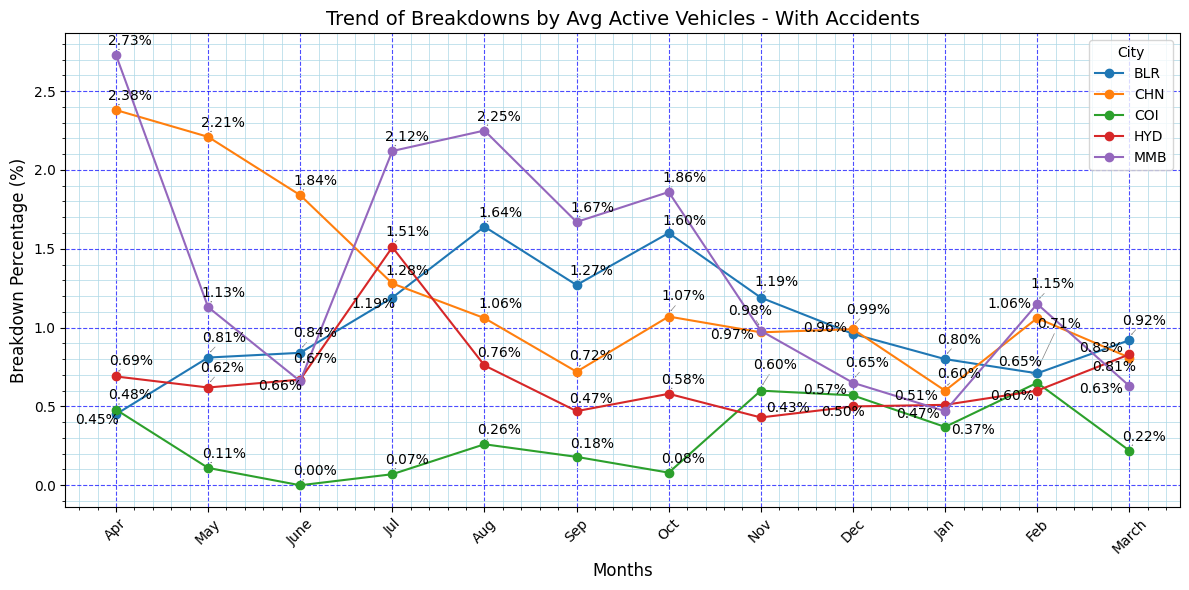

In [30]:
#1.with Accidents

import pandas as pd
import io
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Data with percentage values, manually modified for the month of Oct
data1 = '''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.45%,2.38%,0.48%,0.69%,2.73%
2024,May,0.81%,2.21%,0.11%,0.62%,1.13%
2024,June,0.84%,1.84%,0.00%,0.67%,0.66%
2024,Jul,1.19%,1.28%,0.07%,1.51%,2.12%
2024,Aug,1.64%,1.06%,0.26%,0.76%,2.25%
2024,Sep,1.27%,0.72%,0.18%,0.47%,1.67%
2024,Oct,1.60%,1.07%,0.08%,0.58%,1.86%
2024,Nov,1.19%,0.97%,0.60%,0.43%,0.98%
2024,Dec,0.96%,0.99%,0.57%,0.50%,0.65%
2025,Jan,0.80%,0.60%,0.37%,0.51%,0.47%
2025,Feb,0.71%,1.06%,0.65%,0.60%,1.15%
2025,March,0.92%,0.81%,0.22%,0.83%,0.63%
'''

# Read CSV data
df = pd.read_csv(io.StringIO(data1), dtype=str)

# Convert percentage values to float
for col in df.columns[2:]:  # Skip 'Year' and 'Months'
    df[col] = df[col].str.rstrip('%').astype(float)

# Set hierarchical index
df.set_index(['Year', 'Months'], inplace=True)

# Reset index for plotting
df = df.reset_index()

# Line plot
plt.figure(figsize=(12, 6))
for city in df.columns[2:]:  # Skip 'Year' and 'Months'
    plt.plot(df['Months'], df[city], label=city, marker='o')

# Collect all text annotations
texts = []
for city in df.columns[2:]:
    for x, y in zip(df['Months'], df[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Plot settings
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - With Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()

# Show plot
plt.show()





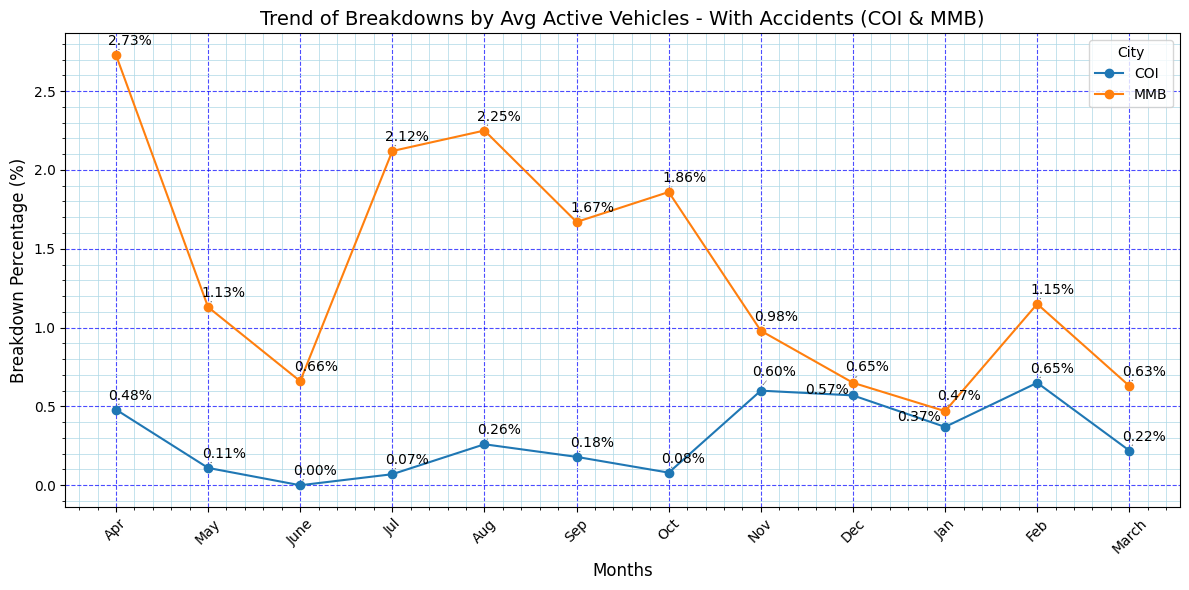

In [32]:
#Filter for COI and MMB

# Filter the DataFrame to include only 'COI' and 'MMB'
df_coi_mmb = df[['Months', 'COI', 'MMB']]

# Line plot
plt.figure(figsize=(12, 6))
for city in df_coi_mmb.columns[1:]:  # Skip 'Months'
    plt.plot(df_coi_mmb['Months'], df_coi_mmb[city], label=city, marker='o')

# Collect all text annotations
texts = []
for city in df_coi_mmb.columns[1:]:
    for x, y in zip(df_coi_mmb['Months'], df_coi_mmb[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Plot settings
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - With Accidents (COI & MMB)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()

# Show plot
plt.show()


### Without Accidents

In [33]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.38%,2.27%,0.48%,0.63%,2.65%
2024,May,0.70%,2.06%,0.16%,0.48%,1.05%
2024,June,0.69%,1.75%,0.00%,0.52%,0.64%
2024,Jul,1.00%,1.21%,0.04%,0.96%,2.11%
2024,Aug,1.43%,0.97%,0.08%,0.62%,2.24%
2024,Sep,1.15%,0.68%,0.11%,0.44%,1.57%
2024,Oct,1.45%,1.02%,0.06%,0.53%,1.78%
2024,Nov,0.94%,0.87%,0.44%,0.30%,0.88%
2024,Dec,0.72%,0.92%,0.37%,0.44%,0.57%
2025,Jan,0.73%,0.53%,0.27%,0.36%,0.40%
2025,Feb,0.58%,1.03%,0.50%,0.44%,0.97%
2025,March,0.69%,0.78%,0.04%,0.64%,0.58%
'''), header=None)


,0,1,2,3,4,5,6
0,Year,Months,BLR,CHN,COI,HYD,MMB
1,2024,Apr,0.38%,2.27%,0.48%,0.63%,2.65%
2,2024,May,0.70%,2.06%,0.16%,0.48%,1.05%
3,2024,June,0.69%,1.75%,0.00%,0.52%,0.64%
4,2024,Jul,1.00%,1.21%,0.04%,0.96%,2.11%
5,2024,Aug,1.43%,0.97%,0.08%,0.62%,2.24%
6,2024,Sep,1.15%,0.68%,0.11%,0.44%,1.57%
7,2024,Oct,1.45%,1.02%,0.06%,0.53%,1.78%
8,2024,Nov,0.94%,0.87%,0.44%,0.30%,0.88%
9,2024,Dec,0.72%,0.92%,0.37%,0.44%,0.57%


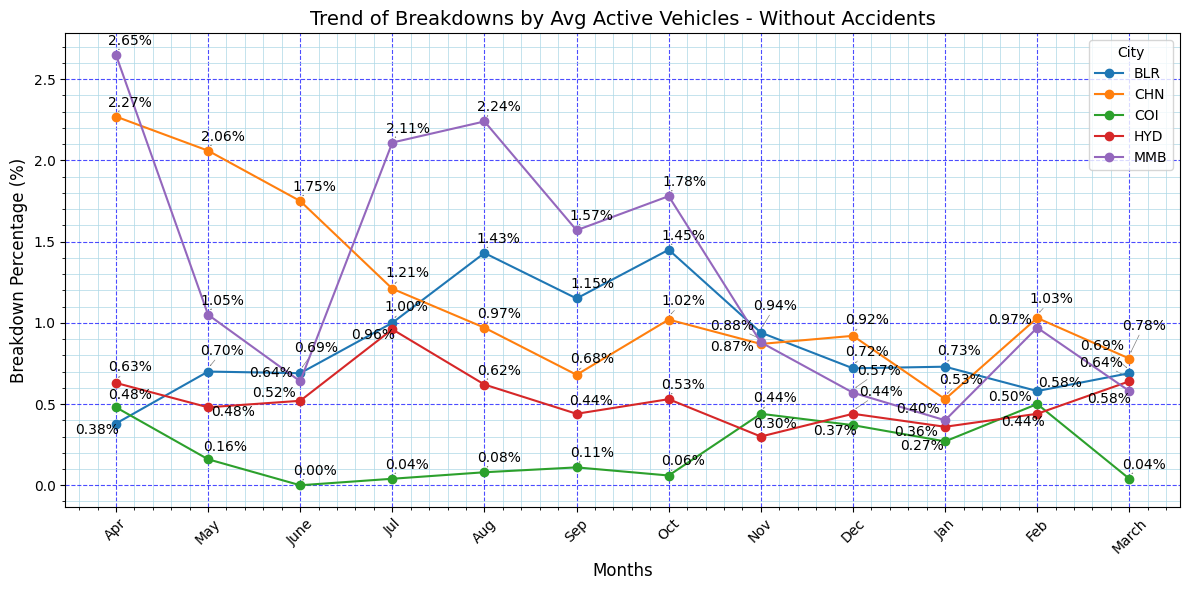

In [34]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Data with percentage values (without accidents)
data1 = '''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.38%,2.27%,0.48%,0.63%,2.65%
2024,May,0.70%,2.06%,0.16%,0.48%,1.05%
2024,June,0.69%,1.75%,0.00%,0.52%,0.64%
2024,Jul,1.00%,1.21%,0.04%,0.96%,2.11%
2024,Aug,1.43%,0.97%,0.08%,0.62%,2.24%
2024,Sep,1.15%,0.68%,0.11%,0.44%,1.57%
2024,Oct,1.45%,1.02%,0.06%,0.53%,1.78%
2024,Nov,0.94%,0.87%,0.44%,0.30%,0.88%
2024,Dec,0.72%,0.92%,0.37%,0.44%,0.57%
2025,Jan,0.73%,0.53%,0.27%,0.36%,0.40%
2025,Feb,0.58%,1.03%,0.50%,0.44%,0.97%
2025,March,0.69%,0.78%,0.04%,0.64%,0.58%
'''

# Read data
df = pd.read_csv(io.StringIO(data1), dtype=str)

# Convert percentage values to float
for col in df.columns[2:]:  # Skip 'Year' and 'Months'
    df[col] = df[col].str.rstrip('%').astype(float)

# Set hierarchical index
df.set_index(['Year', 'Months'], inplace=True)

# Reset index for plotting
df = df.reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
for city in df.columns[2:]:  # Skip 'Year' and 'Months'
    plt.plot(df['Months'], df[city], label=city, marker='o')

# Collect text annotations
texts = []
for city in df.columns[2:]:
    for x, y in zip(df['Months'], df[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Customization
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - Without Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")

# Grid settings
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')

plt.tight_layout()
plt.show()


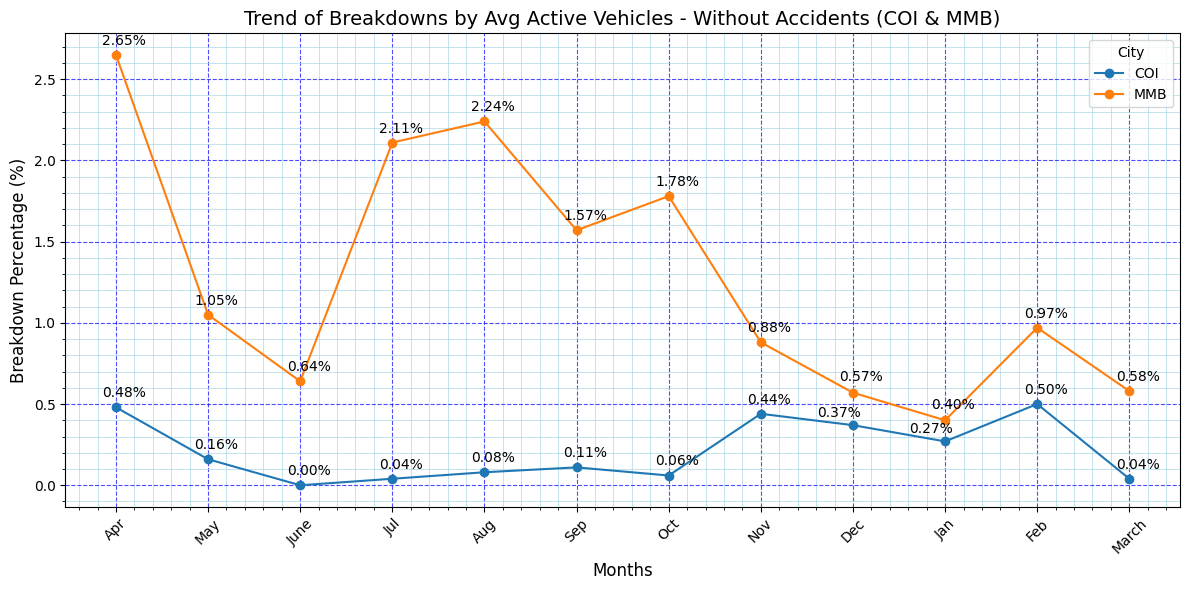

In [35]:
#graph just for COI and MMB

import matplotlib.pyplot as plt
# Assuming 'df' DataFrame is already loaded and processed as in the previous code.

# Filter the DataFrame to include only 'COI' and 'MMB' (without accidents)
df_coi_mmb = df[['Months', 'COI', 'MMB']]

# Line plot
plt.figure(figsize=(12, 6))
for city in df_coi_mmb.columns[1:]:  # Skip 'Months'
    plt.plot(df_coi_mmb['Months'], df_coi_mmb[city], label=city, marker='o')

# Collect all text annotations
texts = []
for city in df_coi_mmb.columns[1:]:
    for x, y in zip(df_coi_mmb['Months'], df_coi_mmb[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Plot settings
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - Without Accidents (COI & MMB)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
df

In [ ]:
data

### Breakdowns for last 90 days , with accidents and without accidents.

In [ ]:
#with accidents

# Filter data for the last 90 days from 2 March
start_date = end_date - pd.DateOffset(days=90)
last_90_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group data by date and count breakdowns
daily_breakdowns = last_90_days_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns = daily_breakdowns.reindex(all_dates, fill_value=0)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns.index, daily_breakdowns.values, marker='o')

# Add data labels
for x, y in zip(daily_breakdowns.index, daily_breakdowns.values):
    plt.text(x, y + 0.5, y, ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Breakdowns', fontsize=12)
plt.title('Breakdowns in the last 90 days with accidents', fontsize=14)
plt.tight_layout()
# Format x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Major ticks on weekly intervals
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks on daily intervals


# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')

# Show the plot
plt.show()

In [ ]:
#  Breakdowns for last 90 days , without accidents.


# Filter data for the last 90 days from 2 March
start_date = end_date - pd.DateOffset(days=90)
last_90_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Filter out rows with 'Incident Type' as 'Accident'
last_90_days_data_no_accidents = last_90_days_data[last_90_days_data['Incident Type'] != 'Accident']

# Group data by date and count breakdowns
daily_breakdowns_no_accidents = last_90_days_data_no_accidents.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_no_accidents = daily_breakdowns_no_accidents.reindex(all_dates, fill_value=0)


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values, marker='o',color='green')

# Add data labels
for x, y in zip(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values):
    plt.text(x, y + 0.5, y, ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Breakdowns', fontsize=12)
plt.title('Breakdowns in the last 90 days without accidents', fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Major ticks on weekly intervals
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks on daily intervals
plt.tight_layout()

# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')

# Show the plot
plt.show()

## Last 30 days


In [ ]:

from datetime import datetime, timedelta

# Assuming 'data' DataFrame is available as in the original code

def plot_breakdowns_last_30_days(data, with_accidents=True):
    end_date = datetime(2025, 3, 16)  # Fixed end date
    start_date = end_date - timedelta(days=30)

    filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

    if not with_accidents:
        filtered_data = filtered_data[filtered_data['Incident Type'] != 'Accident']

    daily_breakdowns = filtered_data.groupby('Incident Date')['ID'].count()
    all_dates = pd.date_range(start=start_date, end=end_date)
    daily_breakdowns = daily_breakdowns.reindex(all_dates, fill_value=0)

    plt.figure(figsize=(14, 8))
    plt.plot(daily_breakdowns.index, daily_breakdowns.values, marker='o')

    for x, y in zip(daily_breakdowns.index, daily_breakdowns.values):
        plt.text(x, y + 0.5, y, ha='center', va='bottom', fontsize=10)

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Breakdowns', fontsize=12)
    title = 'Breakdowns in the last 30 days'
    if with_accidents:
        title += ' (with accidents)'
    else:
        title += ' (without accidents)'
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
# Major gridlines (dashed blue)
    plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')

    plt.show()


# Example usage (assuming 'data' DataFrame is available):
plot_breakdowns_last_30_days(data, with_accidents=True)


In [ ]:
plot_breakdowns_last_30_days(data, with_accidents=False)

### Accidents from last 6 months

In [ ]:

# Filter data for accidents only
accident_data = data[data['Incident Type'] == 'Accident']

# Group by date and count accidents
daily_accidents = accident_data.groupby('Incident Date')['ID'].count()

# Create a visually appealing line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', linestyle='-', color='orange')

# Add data labels to the points
for x, y in zip(daily_accidents.index, daily_accidents.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=11)


plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Accidents Over Time-April 24 to March 25')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()


Accidents over last 6 months

In [ ]:


# Filter data for accidents within the specified date range
accident_data_filtered = accident_data[(accident_data['Incident Date'] >= '2024-04-01') & (accident_data['Incident Date'] <= '2025-03-31')]

# Group by month and count accidents
monthly_accidents = accident_data_filtered.groupby(accident_data_filtered['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the index to datetime objects for plotting
monthly_accidents.index = monthly_accidents.index.to_timestamp()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_accidents.index.strftime('%b %Y'), monthly_accidents.values, color='orange')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents from April 2024 to March 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.info(0)

In [ ]:
# Top 10 values of root cause column fro last 30 days with data labels

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
# Replace 'data' with the actual name of your DataFrame.

# Filter data for the last 30 days
end_date = pd.to_datetime('2024-12-6')  # Fixed end date
start_date = end_date - pd.DateOffset(days=30)
last_30_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group by 'Root cause' and count occurrences
root_cause_counts = last_30_days_data['Root cause '].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values)
plt.xlabel('Root Cause')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Root Causes for the last 30 days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

##COI v/s MMB case study

In [ ]:
#For COI and MMB perform comparison analysis and represent in form of graphs , with appropriate chart titles , data lables. Combine graphs and represent comparision with data labels


# Filter data for COI and MMB
coi_data = data[data['FON'] == 'COI']
mmb_data = data[data['FON'] == 'MMB']

# Group by month and count breakdowns for COI
coi_monthly_breakdowns = coi_data.groupby(coi_data['Incident Date'].dt.to_period('M'))['ID'].count()

# Group by month and count breakdowns for MMB
mmb_monthly_breakdowns = mmb_data.groupby(mmb_data['Incident Date'].dt.to_period('M'))['ID'].count()


# Convert the index to datetime objects for plotting
coi_monthly_breakdowns.index = coi_monthly_breakdowns.index.to_timestamp()
mmb_monthly_breakdowns.index = mmb_monthly_breakdowns.index.to_timestamp()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot COI data
plt.bar(coi_monthly_breakdowns.index, coi_monthly_breakdowns.values, width=10, label='COI', color='blue', alpha=0.5)

# Plot MMB data
plt.bar(mmb_monthly_breakdowns.index, mmb_monthly_breakdowns.values, width=10, label='MMB', color='green', alpha=0.5)



# Add data labels for COI
for x, y in zip(coi_monthly_breakdowns.index, coi_monthly_breakdowns.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='blue')

# Add data labels for MMB
for x, y in zip(mmb_monthly_breakdowns.index, mmb_monthly_breakdowns.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='green')

# Customize chart
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Monthly Breakdowns Comparison: COI vs. MMB')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Compare COI and MMB breakdowns over the last 90 days


end_date = pd.to_datetime('2025-03-16')
start_date = end_date - pd.DateOffset(days=90)


coi_last_90_days = coi_data[(coi_data['Incident Date'] >= start_date) & (coi_data['Incident Date'] <= end_date)]
mmb_last_90_days = mmb_data[(mmb_data['Incident Date'] >= start_date) & (mmb_data['Incident Date'] <= end_date)]

coi_daily_breakdowns = coi_last_90_days.groupby('Incident Date')['ID'].count()
mmb_daily_breakdowns = mmb_last_90_days.groupby('Incident Date')['ID'].count()

all_dates = pd.date_range(start=start_date, end=end_date)
coi_daily_breakdowns = coi_daily_breakdowns.reindex(all_dates, fill_value=0)
mmb_daily_breakdowns = mmb_daily_breakdowns.reindex(all_dates, fill_value=0)

plt.figure(figsize=(12, 6))

plt.plot(coi_daily_breakdowns.index, coi_daily_breakdowns.values, label='COI', marker='o', color='blue')
plt.plot(mmb_daily_breakdowns.index, mmb_daily_breakdowns.values, label='MMB', marker='o', color='green')

plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('COI vs. MMB Breakdowns (Last 90 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

